# EXPERIMENT 1_2: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *

from IPython import embed


In [ ]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/mag_1_2/'


# Load data

In [2]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/1.1/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_baseline_ex_1_1.list'

def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [3]:
# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

In [4]:

# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_children)


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

In [5]:


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_canonical_df_BIBLE.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Finding the threshold

In [7]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.01).tolist()

df_all_threshold_x = compute_metrics_ex_1_2(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.1
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.10800000000000001
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.11600000000000002
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.12400000000000003
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.13200000000000003
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.14000000000000004
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, perce

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.1
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.10800000000000001
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.11600000000000002
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.12400000000000003
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.13200000000000003
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.14000000000000004
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0

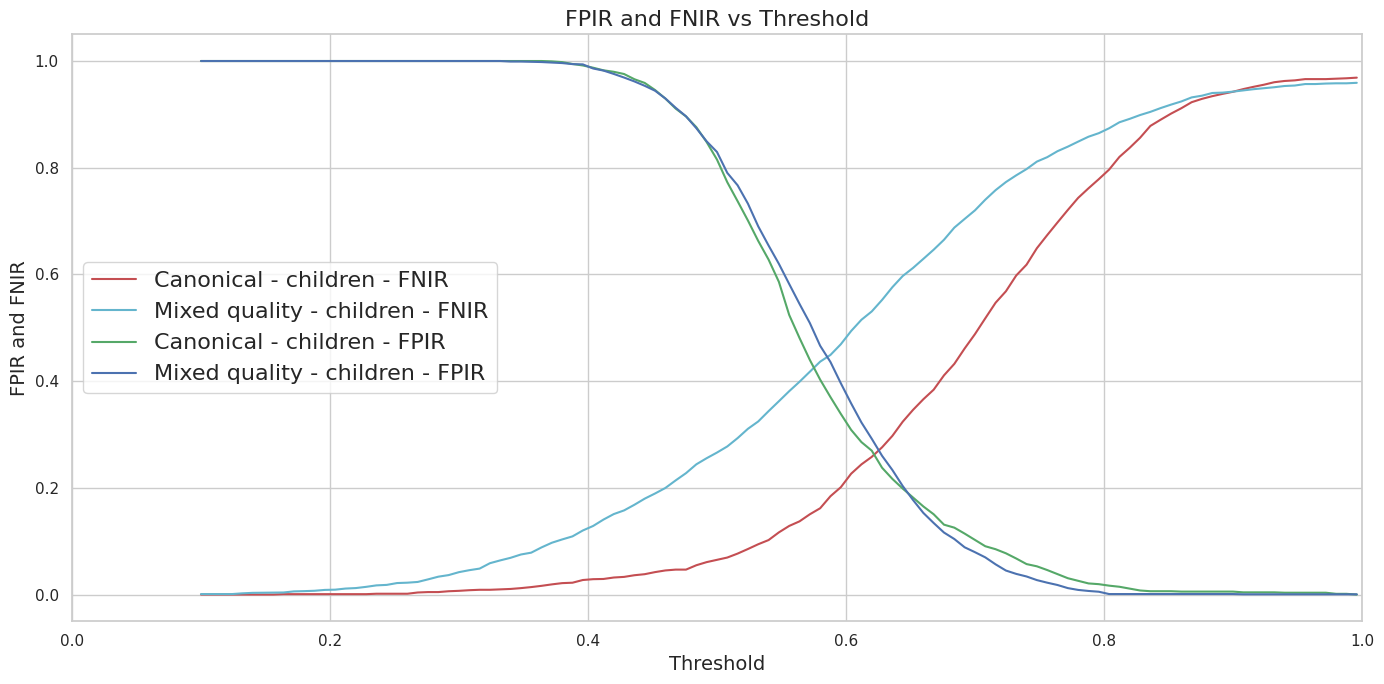

In [8]:
plot_threshold_metrics_ex_1_2(df_all_threshold_x, 'MagFace ex. 1.2', save_fig_path)

# Stats - 10 experiment

In [7]:

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_2 = evaluate_metrics_ex_1_2(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)

FPD result:  0.0
FND result:  0.35794795563323917
GARBE result, GARBE close to 1 means more unfair:  0.26846096672492936
done
FPD result:  0.0
FND result:  0.34966293064229287
GARBE result, GARBE close to 1 means more unfair:  0.26224719798171964
done
FPD result:  0.0
FND result:  0.3219508573973721
GARBE result, GARBE close to 1 means more unfair:  0.24146314304802907
done
FPD result:  0.0
FND result:  0.33489062627693483
GARBE result, GARBE close to 1 means more unfair:  0.2511679697077011
done
FPD result:  0.0
FND result:  0.36257564643315604
GARBE result, GARBE close to 1 means more unfair:  0.27193173482486704
done
FPD result:  0.01254075116274716
FND result:  0.2983077347558172
GARBE result, GARBE close to 1 means more unfair:  0.22686598885754966
done
FPD result:  0.0
FND result:  0.29929446322284137
GARBE result, GARBE close to 1 means more unfair:  0.22447084741713103
done
FPD result:  0.0
FND result:  0.38348169074143174
GARBE result, GARBE close to 1 means more unfair:  0.28

In [ ]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


In [ ]:

latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

# Stats

In [ ]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Saving sim to plot all of the dist 

In [10]:
# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10
# List to hold all the arrays
sim_mat_c_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_2:
        sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_2[key])

# Concatenate all arrays into one big array
sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all_mag_1_2.csv', index=False)
# Print the big array
print(len(sim_mat_c_enrolled_iterations_all))



# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_a_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_2:
        sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_2[key])

# Concatenate all arrays into one big array
sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all_mag_1_2.csv', index=False)


# Print the big array
print(len(sim_mat_a_enrolled_iterations_all))

# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_c_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_2:
        sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_2[key])

sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all_mag_1_2.csv', index=False)
# Print the big array
print(len(sim_mat_c_non_enrolled_iterations_all))



sim_mat_a_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_2:
        sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_2[key])

sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all_mag_1_2.csv', index=False)

# Print the big array
print(len(sim_mat_a_non_enrolled_iterations_all))


91850
125196
14218887
32751054


# Load pre-saved stuff

In [11]:

# Loading pre-saved stuff
sim_mat_c_enrolled_iterations_all = (pd.read_csv('sim_mat_c_enrolled_iterations_all_mag_1_2.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all = (pd.read_csv('sim_mat_a_enrolled_iterations_all_mag_1_2.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_mag_1_2.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_mag_1_2.csv')).values.flatten()


# From DET utils - check import

In [12]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [13]:
mated_scores1 = sim_mat_a_enrolled_iterations_all
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,125196.000000,3.275105e+07
1,Minimum,-0.023164,-4.297026e-01
2,Maximum,0.996555,9.998632e-01
3,Mean,0.634160,1.806749e-01
4,St. Dev.,0.140595,1.292758e-01
5,Skewness,-0.438950,2.752332e-01
6,Ex. Kurtosis,0.295455,3.918235e-02


In [14]:

mated_scores2 = sim_mat_c_enrolled_iterations_all

nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,91850.000000,1.421889e+07
1,Minimum,0.084974,-4.199412e-01
2,Maximum,0.996555,9.998632e-01
3,Mean,0.663254,1.883834e-01
4,St. Dev.,0.131433,1.320223e-01
5,Skewness,-0.449222,3.030009e-01
6,Ex. Kurtosis,0.201319,1.568636e-01


In [15]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

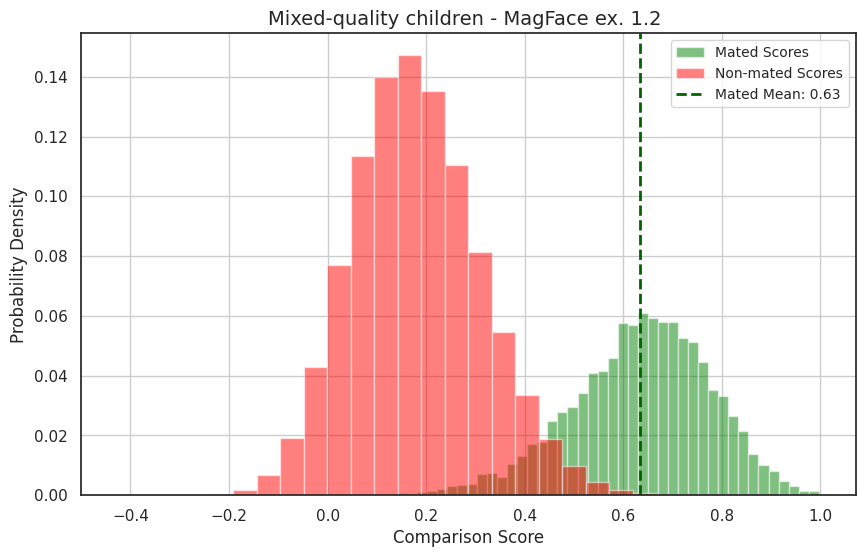

In [17]:

plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Mixed-quality children - MagFace ex. 1.2 ', save_fig_path=save_fig_path)


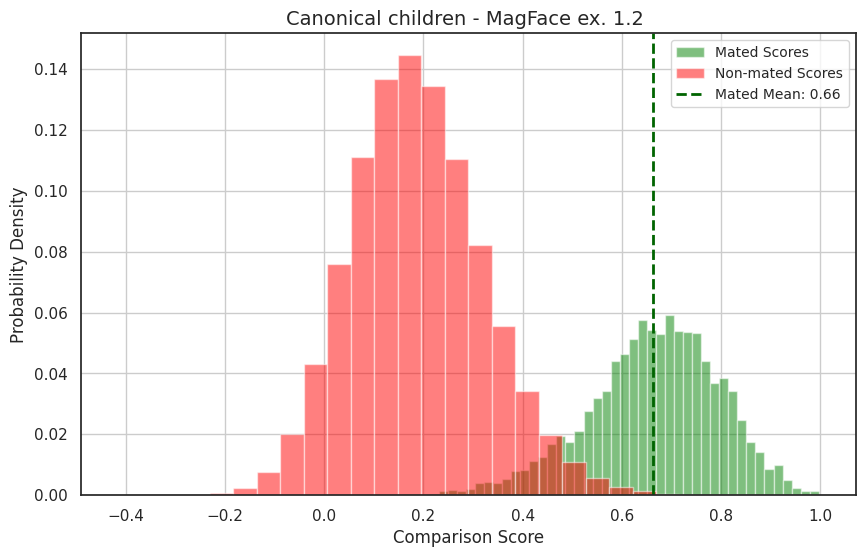

In [18]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True,title = 'Canonical children - MagFace ex. 1.2 ', save_fig_path=save_fig_path)


# DET curves

In [19]:
from DET_utils.DET_plots import *
from DET_utils.DET import *

In [9]:
mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores1)
nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores1)

In [ ]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


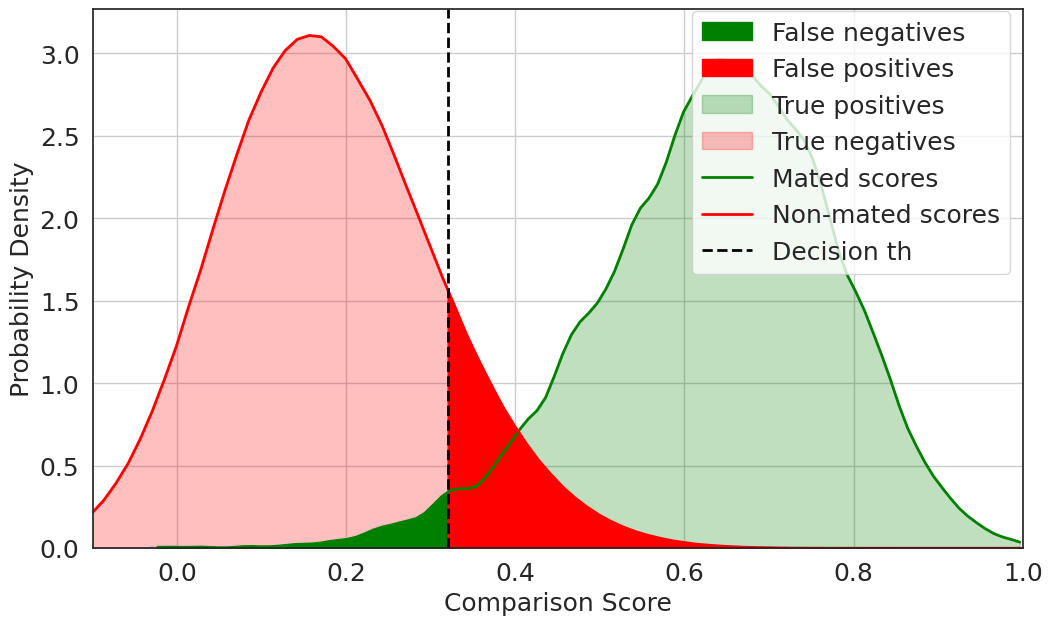

In [20]:
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='Mixed-quality - MagFace ex. 1.2')

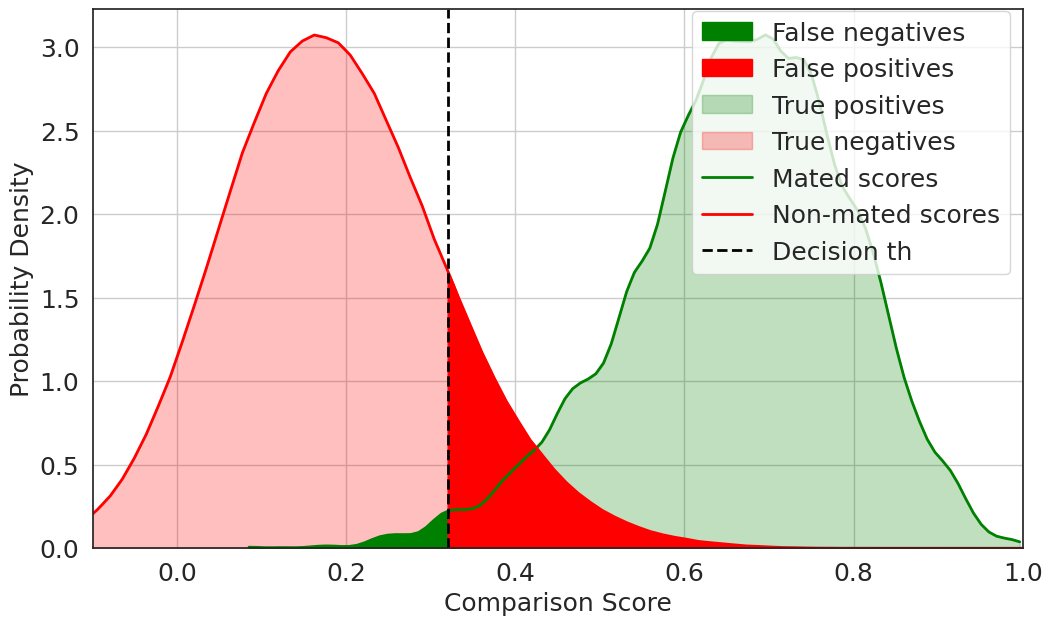

In [21]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='Canonical - MagFace ex. 1.2')

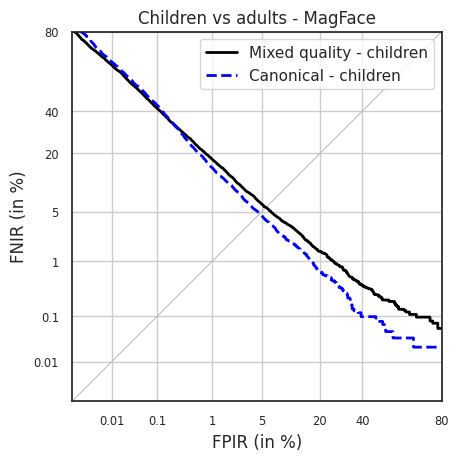

In [22]:
DET_plotting_1_2('Canonical vs Mixed-quality - MagFace ex. 1.2', save_fig_path)
